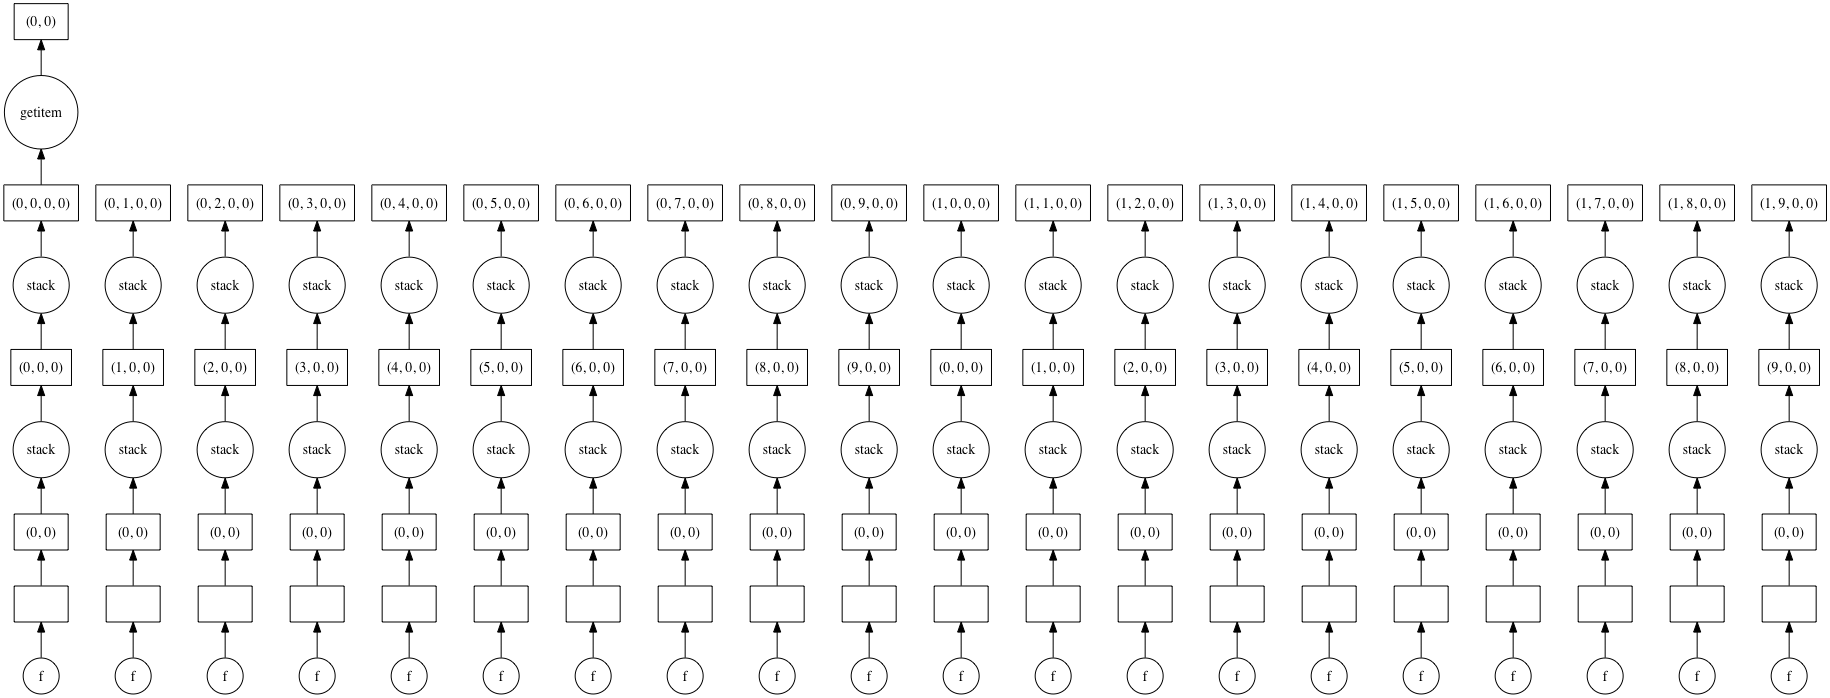

In [72]:
from dask import delayed
import dask.array as da
import numpy as np

shape = (10, 10)


@delayed
def f(a):
    # simualte some io operation
    print(f"{a}")
    return np.zeros(shape)


arr = da.stack(
    da.stack([da.from_delayed(f(a), shape, "float64") for a in range(10)])
    for b in range(2)
)

arr.shape
arr[0, 0].visualize()

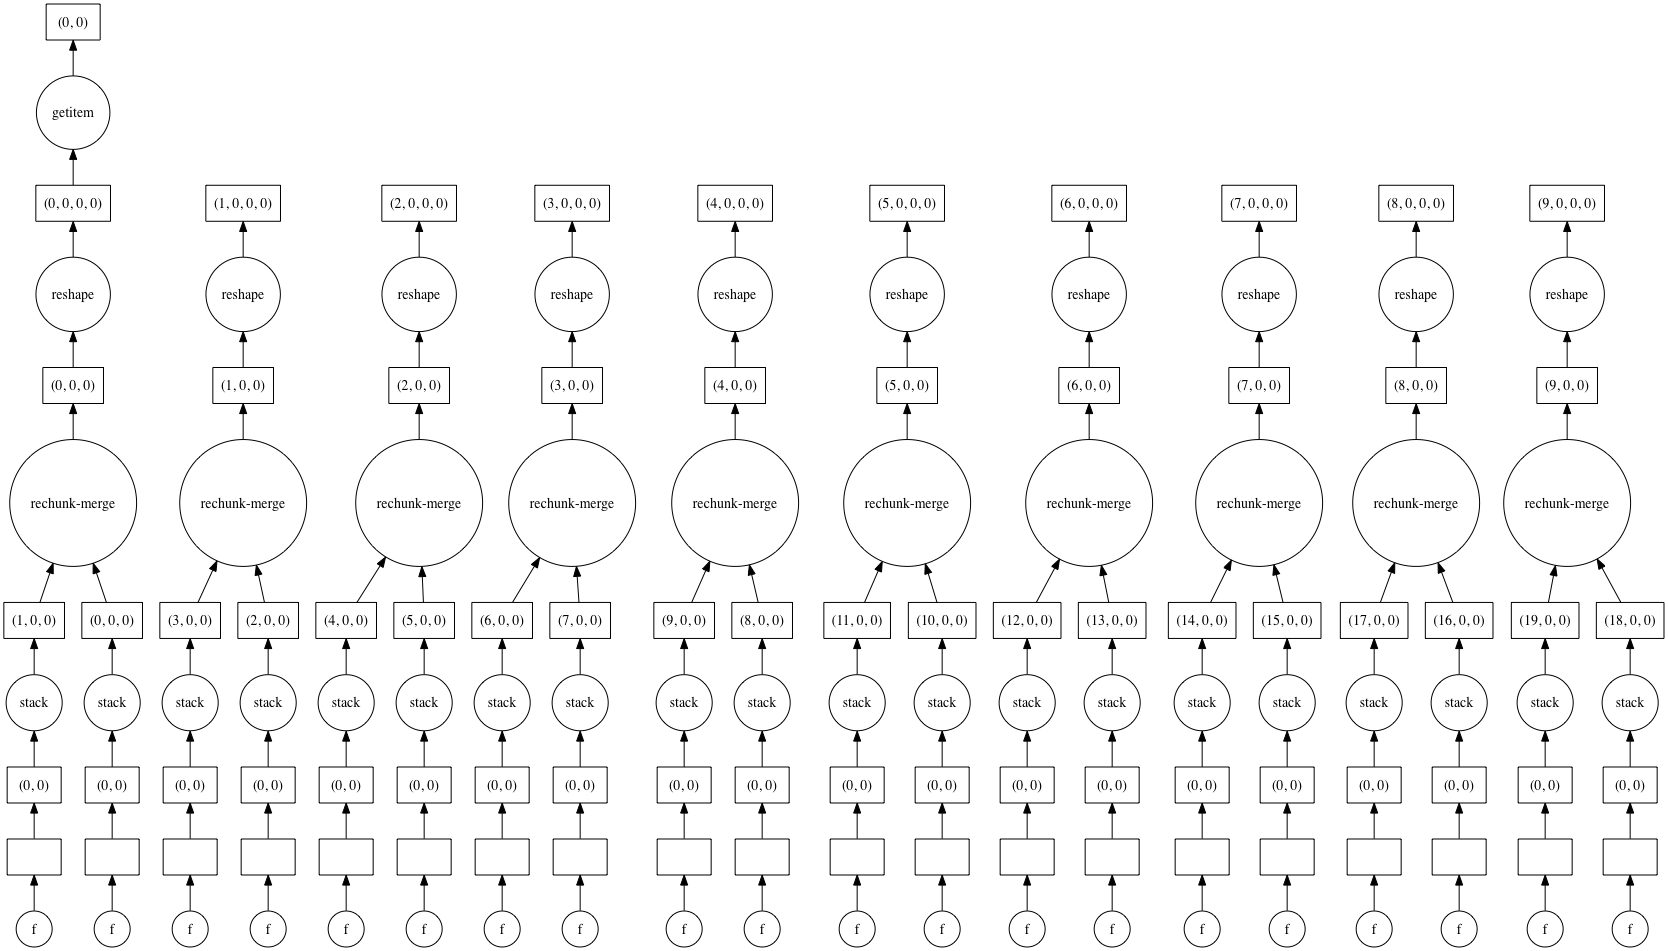

In [61]:
arr.reshape(10, 2, *shape)[0, 0].visualize()

In [68]:
rechunked = arr.reshape(2, 10, 10, 10).rechunk((1, 1, 10, 10))
rechunked
# dask.array<rechunk-merge, shape=(2, 10, 10, 10), dtype=float64, chunksize=(1, 1, 10, 10)>

rechunked[0, 0].compute()
# still calls f() 10 times

0, 0
0, 1
1, 0
1, 1
2, 02, 1
3, 0
3, 1

4, 04, 1



array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

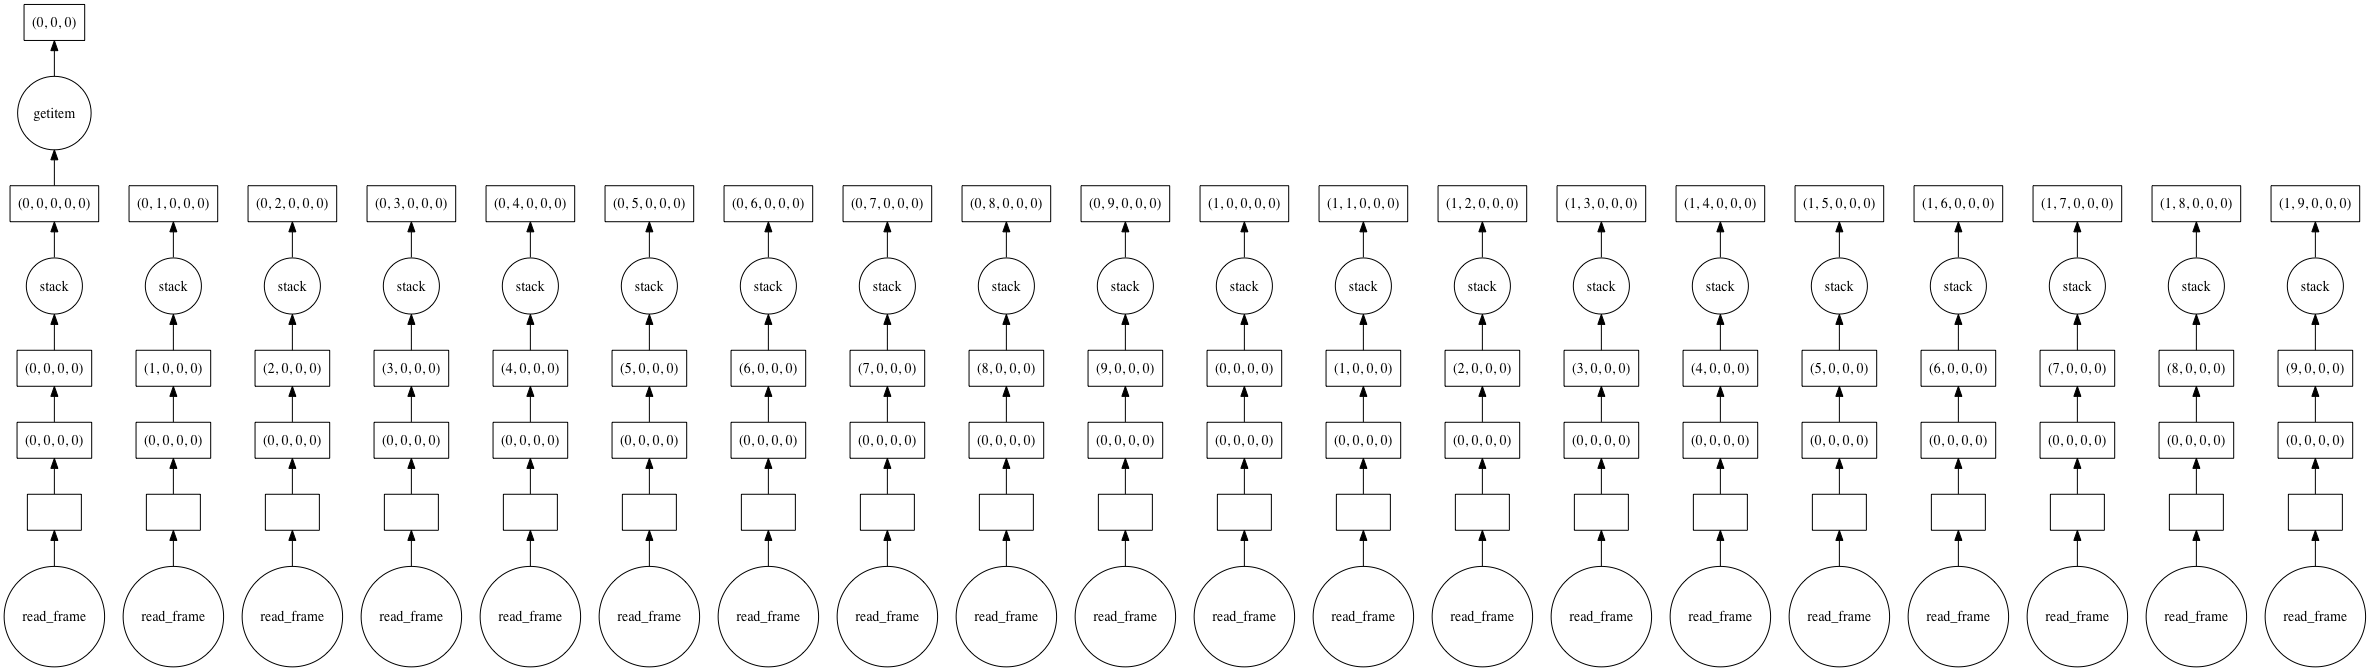

In [80]:
from dask_image.imread import imread

stack = da.stack([imread(f"data/*ch{i}*.tif") for i in range(2)])
stack.shape
stack[0, 0].visualize()

In [2]:
from dask_image.imread import imread
import dask.array as da

In [3]:
 file_pattern = '/Volumes/850EVO/mitosis/*.tif'

In [4]:
stack = imread(file_pattern)

/Users/talley/miniconda3/envs/all/lib/python3.7/site-packages/skimage/external/tifffile/tifffile.py:2133: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


In [6]:
stack

,Array,Chunk
Bytes,10.22 GB,8.52 MB
Shape,"(1200, 65, 256, 256)","(1, 65, 256, 256)"
Count,3600 Tasks,1200 Chunks
Type,uint16,numpy.ndarray
